In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Load the api client id and secret from file
f = open('.apikeys.json')
apikeys = json.load(f)
CLIENT_ID = apikeys['clientId']
CLIENT_SECRET = apikeys['clientSecret']

In [3]:
#get access token
AUTH_URL = 'https://accounts.spotify.com/api/token'

auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [4]:
headers = {
    'Authorization': f'Bearer {access_token}'
}

In [5]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# Track ID from the URI
track_id = '1PeR6Q2g7EZDhDUIyCXLCG'

# actual GET request with proper header
analysis = requests.get(BASE_URL + 'audio-analysis/' + track_id, headers=headers)

In [6]:
analysis

<Response [200]>

In [7]:
analysis = analysis.json()
analysis.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

In [8]:
track = requests.get(BASE_URL + 'tracks/' + track_id, headers=headers)
track = track.json()

track

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gU5B9awyQfxX24z8MwErn'},
    'href': 'https://api.spotify.com/v1/artists/4gU5B9awyQfxX24z8MwErn',
    'id': '4gU5B9awyQfxX24z8MwErn',
    'name': 'Miranda and the Beat',
    'type': 'artist',
    'uri': 'spotify:artist:4gU5B9awyQfxX24z8MwErn'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gU5B9awyQfxX24z8MwErn'},
    'href': 'https://api.spotify.com/v1/artists/4gU5B9awyQfxX24z8MwErn',
    'id': '4gU5B9awyQfxX24z8MwErn',
    'name': 'Miranda and the Beat',
    'type': 'artist',
    'uri': 'spotify:artist:4gU5B9awyQfxX24z8MwErn'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',

In [9]:
features = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)

In [10]:
features = features.json()

In [11]:
features

{'danceability': 0.538,
 'energy': 0.737,
 'key': 7,
 'loudness': -5.77,
 'mode': 0,
 'speechiness': 0.043,
 'acousticness': 0.0623,
 'instrumentalness': 0.133,
 'liveness': 0.315,
 'valence': 0.693,
 'tempo': 89.931,
 'type': 'audio_features',
 'id': '1PeR6Q2g7EZDhDUIyCXLCG',
 'uri': 'spotify:track:1PeR6Q2g7EZDhDUIyCXLCG',
 'track_href': 'https://api.spotify.com/v1/tracks/1PeR6Q2g7EZDhDUIyCXLCG',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1PeR6Q2g7EZDhDUIyCXLCG',
 'duration_ms': 192000,
 'time_signature': 4}

In [12]:
test_sections = pd.DataFrame(analysis['segments'])

In [13]:
test_sections

,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,pitches,timbre
0,0.00000,0.12209,0.965,-60.000,0.08328,-49.039,0.0,"[0.196, 0.748, 1.0, 0.246, 0.614, 0.171, 0.356...","[5.959, 134.345, 76.914, -101.02, 104.743, 2.2..."
1,0.12209,0.17986,0.643,-49.602,0.08297,-43.456,0.0,"[0.309, 0.516, 0.731, 0.298, 0.98, 0.368, 0.62...","[14.709, 142.622, 39.238, -16.053, 75.992, -16..."
2,0.30195,0.35986,0.168,-46.230,0.10720,-43.082,0.0,"[0.735, 0.611, 0.77, 0.44, 0.983, 0.308, 0.388...","[13.453, 97.382, 31.281, 24.398, 47.635, -21.9..."
3,0.66181,0.11011,0.296,-52.937,0.01175,-49.941,0.0,"[0.2, 0.504, 0.645, 0.22, 1.0, 0.142, 0.252, 0...","[8.197, 125.287, 19.665, 5.915, 97.151, -48.95..."
4,0.77193,0.14522,1.000,-53.877,0.04750,-38.057,0.0,"[0.1, 0.249, 0.133, 0.131, 0.287, 0.275, 1.0, ...","[16.578, 49.289, 72.566, 62.994, 83.633, 38.15..."
...,...,...,...,...,...,...,...,...,...
647,184.86522,0.67959,0.070,-4.130,0.02043,-1.595,0.0,"[0.316, 0.423, 1.0, 0.458, 0.384, 0.421, 0.639...","[56.629, 45.706, 60.004, 3.702, 49.891, -57.22..."
648,185.54482,0.66190,0.244,-3.727,0.00351,-0.687,0.0,"[0.498, 0.379, 0.747, 0.313, 0.323, 0.486, 0.6...","[55.786, 28.461, 40.296, 19.522, 48.952, -65.1..."
649,186.20671,0.26141,0.475,-8.720,0.00251,-2.490,0.0,"[0.202, 0.113, 0.325, 0.105, 0.089, 0.149, 0.2...","[54.321, 17.039, 55.724, -8.175, 45.113, -69.2..."
650,186.46812,3.00680,0.113,-7.456,0.06660,-4.794,0.0,"[0.009, 0.009, 0.131, 0.009, 0.009, 0.026, 0.0...","[44.918, 37.753, -8.769, 228.706, 47.055, -6.6..."


In [14]:
test_sections.pitches

0      [0.196, 0.748, 1.0, 0.246, 0.614, 0.171, 0.356...
1      [0.309, 0.516, 0.731, 0.298, 0.98, 0.368, 0.62...
2      [0.735, 0.611, 0.77, 0.44, 0.983, 0.308, 0.388...
3      [0.2, 0.504, 0.645, 0.22, 1.0, 0.142, 0.252, 0...
4      [0.1, 0.249, 0.133, 0.131, 0.287, 0.275, 1.0, ...
                             ...                        
647    [0.316, 0.423, 1.0, 0.458, 0.384, 0.421, 0.639...
648    [0.498, 0.379, 0.747, 0.313, 0.323, 0.486, 0.6...
649    [0.202, 0.113, 0.325, 0.105, 0.089, 0.149, 0.2...
650    [0.009, 0.009, 0.131, 0.009, 0.009, 0.026, 0.0...
651    [0.335, 0.308, 0.344, 0.313, 0.304, 0.624, 0.9...
Name: pitches, Length: 652, dtype: object

In [15]:
#check to see if all section pitches have lists that are all the same length
length = 0
for i, section in enumerate(test_sections.pitches):
    if i == 0:
        length = len(section)
    else:
        if length == len(section):
            continue
        else:
            print('not the same length')
    print('all the same length')

all the same length


In [16]:

pitches = []
for section in test_sections.pitches:
    pitches.append(section)

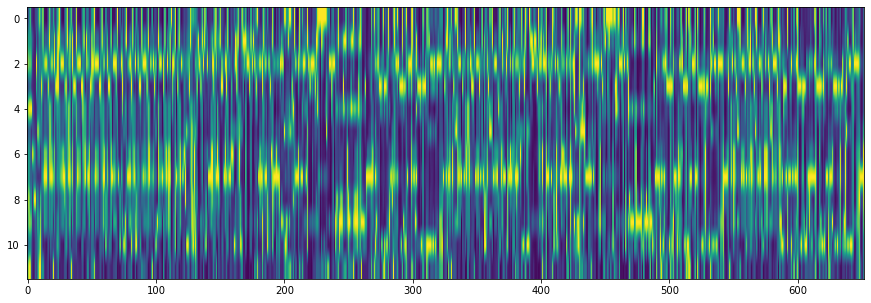

In [17]:
pitch_array = np.array(pitches[:])

fig, ax = plt.subplots(figsize=(15,5))
ax.imshow(pitch_array.T, aspect='auto')


In [185]:
params = {
    'seed_tracks':track_id
}

recommendations = requests.get(BASE_URL + 'recommendations/', params=params, headers=headers)

In [186]:
recommendations = recommendations.json()

In [187]:
recommendations.keys()

dict_keys(['tracks', 'seeds'])

In [188]:
pd.DataFrame(recommendations['tracks'])

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,99386,False,{'isrc': 'HKI190721814'},{'spotify': 'https://open.spotify.com/track/0b...,https://api.spotify.com/v1/tracks/0bfX5RnHIgT8...,0bfX5RnHIgT8QnPvzun98y,False,Piano Pieces for Children: No. 2. Clouds,36,https://p.scdn.co/mp3-preview/0e9956761e6f499a...,14,track,spotify:track:0bfX5RnHIgT8QnPvzun98y
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,268533,False,{'isrc': 'US2391601602'},{'spotify': 'https://open.spotify.com/track/0L...,https://api.spotify.com/v1/tracks/0L2ljTJonS78...,0L2ljTJonS78v8qSlpxM0d,False,High On A Rocky Ledge,48,https://p.scdn.co/mp3-preview/5490949167534e80...,2,track,spotify:track:0L2ljTJonS78v8qSlpxM0d
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,279323,False,{'isrc': 'DEN961904040'},{'spotify': 'https://open.spotify.com/track/6f...,https://api.spotify.com/v1/tracks/6f4FXkPexn21...,6f4FXkPexn21cOmHd5E4rb,False,China Gates,20,None,4,track,spotify:track:6f4FXkPexn21cOmHd5E4rb
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,233426,False,{'isrc': 'USNO11700822'},{'spotify': 'https://open.spotify.com/track/6F...,https://api.spotify.com/v1/tracks/6FZDedaCzYhO...,6FZDedaCzYhO4sdG3VYcHZ,False,House of Woodcock,46,https://p.scdn.co/mp3-preview/85f50e614b87a987...,13,track,spotify:track:6FZDedaCzYhO4sdG3VYcHZ
4,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,482146,False,{'isrc': 'GB5P52000001'},{'spotify': 'https://open.spotify.com/track/0E...,https://api.spotify.com/v1/tracks/0E5Qd7mge1e9...,0E5Qd7mge1e9gfkCKfGOUR,False,Fearless,21,https://p.scdn.co/mp3-preview/fa76e22612d8839c...,1,track,spotify:track:0E5Qd7mge1e9gfkCKfGOUR
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[CA, US]",1,214066,False,{'isrc': 'DEX170420804'},{'spotify': 'https://open.spotify.com/track/1t...,https://api.spotify.com/v1/tracks/1tzXnPndBrd2...,1tzXnPndBrd2G5GXrOBc1c,False,Vitamin C - 2004 Remastered Version,50,https://p.scdn.co/mp3-preview/663a8363c8a9a7cc...,4,track,spotify:track:1tzXnPndBrd2G5GXrOBc1c
6,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,219893,False,{'isrc': 'ATMA40501788'},{'spotify': 'https://open.spotify.com/track/2V...,https://api.spotify.com/v1/tracks/2VlAMa7hi1b4...,2VlAMa7hi1b4c72Rr44008,False,"Four Walls: Act I, Scene 1",17,https://p.scdn.co/mp3-preview/4e2fc59ea00f58b9...,1,track,spotify:track:2VlAMa7hi1b4c72Rr44008
7,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,470106,False,{'isrc': 'USSM12004909'},{'spotify': 'https://open.spotify.com/track/1E...,https://api.spotify.com/v1/tracks/1E9UZJsQaI6T...,1E9UZJsQaI6T5i5kthsgRS,False,Pari intervallo,23,https://p.scdn.co/mp3-preview/813196b694e821fe...,13,track,spotify:track:1E9UZJsQaI6T5i5kthsgRS
8,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,980135,False,{'isrc': 'FISRG2100001'},{'spotify': 'https://open.spotify.com/track/1H...,https://api.spotify.com/v1/tracks/1HJWWQz4FVaw...,1HJWWQz4FVaweYcwVvsucw,False,Luxus 1-3,21,https://p.scdn.co/m

In [275]:
mandb_id = '4gU5B9awyQfxX24z8MwErn'

r = requests.get(BASE_URL + 'artists/' + mandb_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album'})
d = r.json()


In [276]:
d

{'href': 'https://api.spotify.com/v1/artists/4gU5B9awyQfxX24z8MwErn/albums?offset=0&limit=20&include_groups=album',
 'items': [],
 'limit': 20,
 'next': None,
 'offset': 0,
 'previous': None,
 'total': 0}

In [264]:
data = []   # will hold all track info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in d['items']:
    album_name = album['name']

    # here's a hacky way to skip over albums we've already grabbed
    trim_name = album_name.split('(')[0].strip()
    if trim_name.upper() in albums or int(album['release_date'][:4]) > 1983:
        continue
    albums.append(trim_name.upper()) # use upper() to standardize
    
    # this takes a few seconds so let's keep track of progress    
    print(album_name)
    
    # pull all tracks from this album
    r = requests.get(BASE_URL + 'albums/' + album['id'] + '/tracks', 
        headers=headers)
    tracks = r.json()['items']
    
    for track in tracks:
        # get audio features (key, liveness, danceability, ...)
        f = requests.get(BASE_URL + 'audio-features/' + track['id'], 
            headers=headers)
        f = f.json()
        
        # combine with album info
        f.update({
            'track_name': track['name'],
            'album_name': album_name,
            'short_album_name': trim_name,
            'release_date': album['release_date'],
            'album_id': album['id']
        })
        
        data.append(f)

In [256]:
data

[]